In [1]:
import glob

import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import cm

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg') # set it here to 'png' or 'svg'

import seaborn as sns
#sns.set()
# Use white grid plot background from seaborn
sns.set(style="whitegrid")

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#PLT_STYLE='Solarize_Light2'
PLT_STYLE='seaborn-paper'

In [41]:
df = pd.read_csv("children-posthoc-questionnaires.csv").set_index("id")
df.columns

Index(['year_group', 'age', 'gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9-friend', 'Q9-toy', 'Q9-teacher', 'Q9-pet', 'Q9-other',
       'SENSORY-sb1', 'ATTENTION-sb2', 'ESCAPE-sb3', 'SENSORY-sb4',
       'ATTENTION-sb5', 'ATTENTION-sb6', 'ESCAPE-sb7', 'ATTENTION-sb8',
       'SENSORY-sb9', 'SENSORY-sb10', 'ESCAPE-sb11', 'ATTENTION-sb12',
       'ESCAPE-sb13', 'TANGIBLE-sb14', 'ATTENTION-sb15', 'ESCAPE-sb16',
       'ESCAPE-sb17', 'SENSORY-sb18', 'ESCAPE-sb19', 'TANGIBLE-sb20',
       'SENSORY-sb21'],
      dtype='object')

In [3]:
questions = [
    "Q1 How much do you like robots\nin general (not just Pepper)?",
    "Q2 How much do you like\nour Pepper?",
    "Q3 Do you want Pepper to stay\nlonger at school?",
    "Q4 Do you think Pepper was\nuseful to you?",
    "Q5 Do you think Pepper is\nuseful for the school?",
    "Q6 I think Pepper is...\nboring/entertaining",
    "Q7 I think Pepper is...\nmean/friendly",
    "Q8 Do you think Pepper could\nbecome your friend?"
]

# Perception of the robot

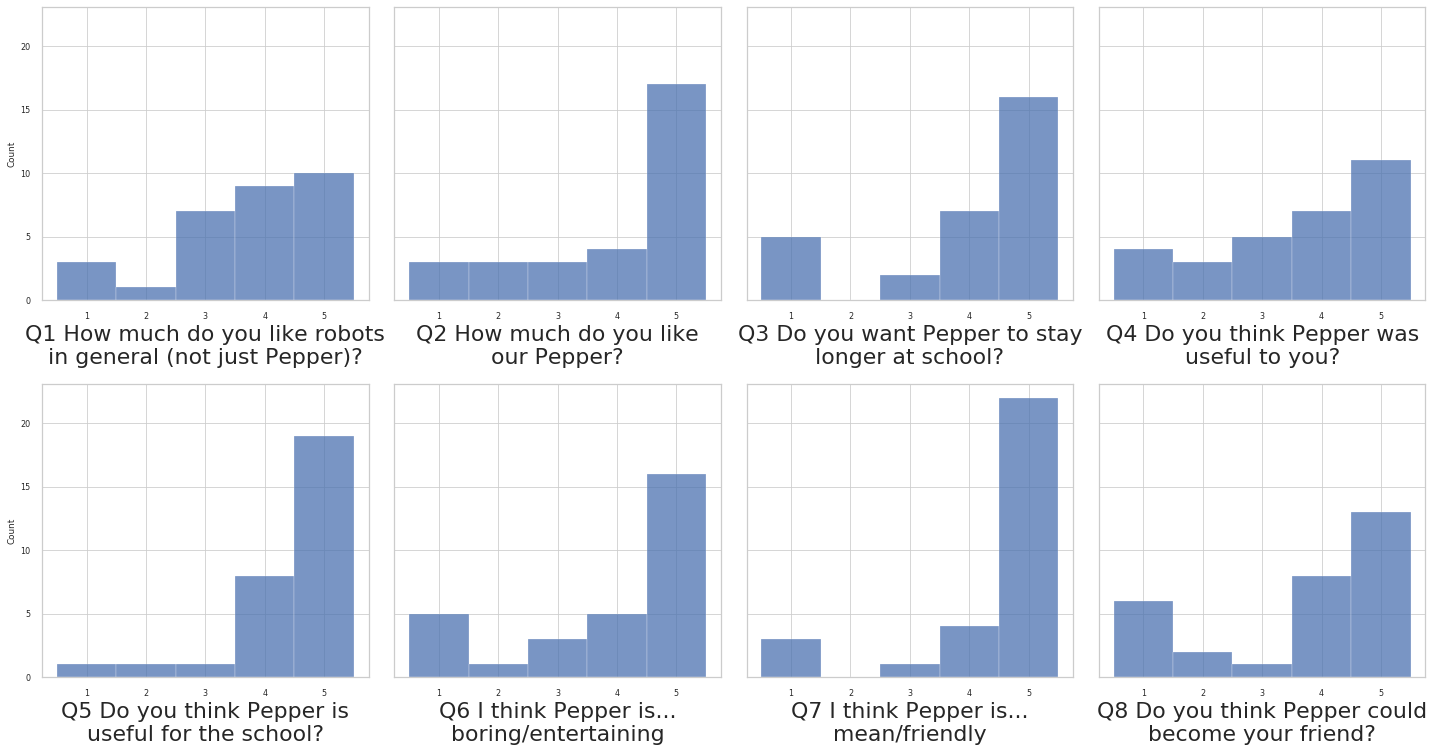

In [4]:
COLS=4
ROWS=2

with plt.style.context(PLT_STYLE):
    fig, axes = plt.subplots(ROWS, COLS,sharey=True, figsize=(20,10))
    #fig.suptitle('Perception of the robot')
    fig.tight_layout(h_pad=5)
    
    for x in range(COLS):
        for y in range(ROWS):
            idx = (y * 4 + x) + 1
            
            sns.histplot(df["Q%s" % idx], ax=axes[y,x],discrete=True,kde=False)
            #axes[y,x].set_title(questions[idx-1])
            axes[y,x].set_xlabel(questions[idx-1], fontsize=22)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

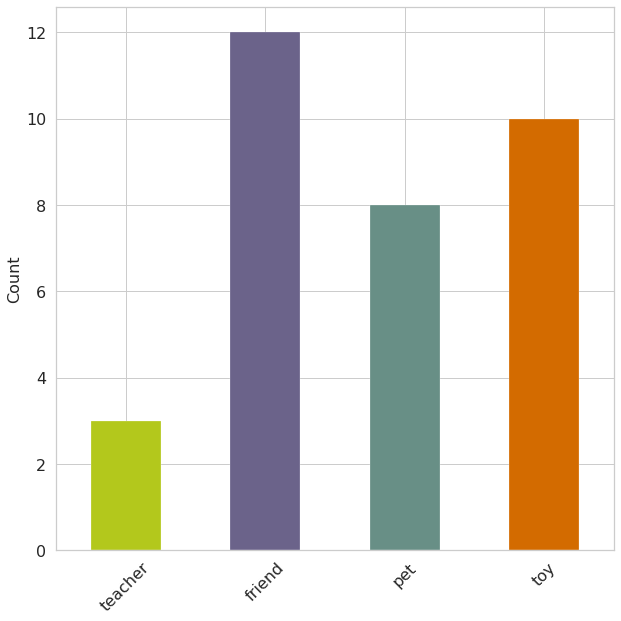

In [33]:
df_social = df[["Q9-teacher", "Q9-friend", "Q9-pet", "Q9-toy"]]
df_social = df_social.rename(columns={"Q9-friend":"friend", "Q9-toy":"toy", "Q9-teacher":"teacher", "Q9-pet":"pet"})

colors = ["#b3c81cff","#6b638aff","#688f86ff","#d36b00ff"]

fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.ylabel('ylabel',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

with plt.style.context(PLT_STYLE):
    df_social.sum().plot.bar(color=colors)
 
ax.set_ylabel("Count")
plt.xticks(rotation=45)

In [34]:
df_reasons = pd.DataFrame(columns=["type"] + list(df.index))

for idx, row in df.T.iterrows():
    type = idx.split("-")[0]
    if type in ["ATTENTION", "ESCAPE", "TANGIBLE", "SENSORY"]:
        df_reasons.loc[idx] = [type] + list(row)


In [35]:
df_reasons["type"].value_counts()

ESCAPE       7
SENSORY      6
ATTENTION    6
TANGIBLE     2
Name: type, dtype: int64

'Reasons' for interacting are captured through the children circling statements they agree with.

These statements each belong to one of the 4 behaviours identified by the school. Because each behaviour does not have the same number of available statements to circle, we normalise the number of responses for each behaviour by the number of statement available for this behaviour.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

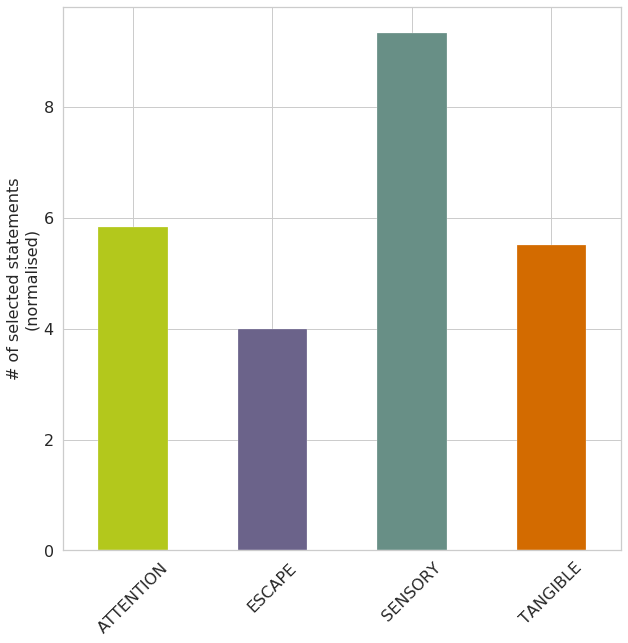

In [64]:
normalised_reasons = df_reasons.groupby("type").count().T.sum()/df_reasons["type"].value_counts()

colors = ["#b3c81cff","#6b638aff","#688f86ff","#d36b00ff"]
fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.ylabel('ylabel',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

with plt.style.context(PLT_STYLE):
    normalised_reasons.plot(kind="bar",color=colors)

ax.set_ylabel("# of selected statements\n(normalised)")
plt.xticks(rotation=45)


In [61]:
incidents = pd.read_csv("incidents.csv").set_index("week")

In [62]:
incidents

,Student L,Student J,Rest of the group
week,,,
Previous week,3,7,12
Study week 1,0,2,3
Study week 2,0,1,1
Study week 3,0,0,2
Following week,5,3,6


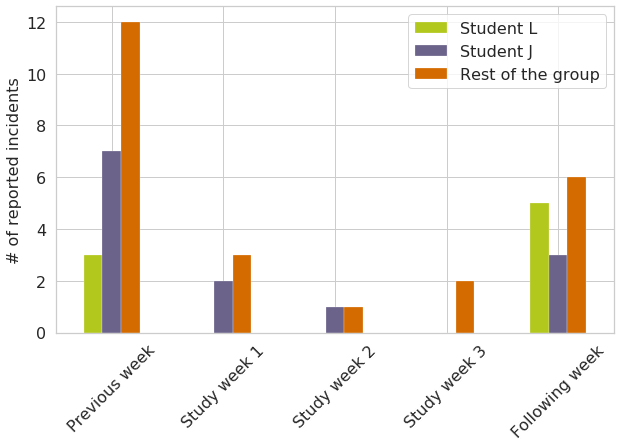

In [63]:
colors = ["#b3c81cff","#6b638aff","#d36b00ff"]
fig, ax = plt.subplots(1,1, figsize=(10,6))

plt.ylabel('ylabel',fontsize=16)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

with plt.style.context(PLT_STYLE):
    incidents.plot.bar(ax=ax, color=colors)

ax.set_ylabel("# of reported incidents")
ax.set_xlabel('')
plt.xticks(rotation=45)
plt.legend(prop={"size":16})